# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [14]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/Bopuc/Documents/Github/2nd-ML100Days/data/'

### 之前做過的處理

In [15]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [16]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [20]:
#仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
age_dt = app_train[['TARGET', 'DAYS_BIRTH']]
age_dt['YEARS_BIRTH'] = age_dt['DAYS_BIRTH']/365
age_dt['YEARS_BIRTH'].describe()
age_dt['YEARS_BIN'] = pd.cut(age_dt['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_dt.groupby(['YEARS_BIN'])['YEARS_BIRTH'].describe()

C:\Users\Bopuc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Bopuc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,count,mean,std,min,25%,50%,75%,max
YEARS_BIN,,,,,,,,
"(20.0, 25.0]",12159.0,23.377522,1.020643,20.517808,22.624658,23.443836,24.227397,25.000000
"(25.0, 30.0]",32862.0,27.822518,1.343024,25.002740,26.882192,27.915068,28.931507,30.000000
"(30.0, 35.0]",39440.0,32.479037,1.432126,30.002740,31.260274,32.443836,33.715068,35.000000
"(35.0, 40.0]",42868.0,37.555913,1.424057,35.002740,36.353425,37.575342,38.786301,40.000000
"(40.0, 45.0]",41406.0,42.459346,1.438679,40.002740,41.208904,42.449315,43.687671,45.000000
"(45.0, 50.0]",35135.0,47.462741,1.435560,45.002740,46.213699,47.432877,48.693151,50.000000
"(50.0, 55.0]",34942.0,52.593136,1.447436,50.002740,51.365068,52.652055,53.852055,55.000000
"(55.0, 60.0]",33120.0,57.491131,1.444457,55.002740,56.257534,57.460274,58.753425,60.000000
"(60.0, 65.0]",27476.0,62.412459,1.458263,60.002740,61.120548,62.389041,63.650000,65.000000


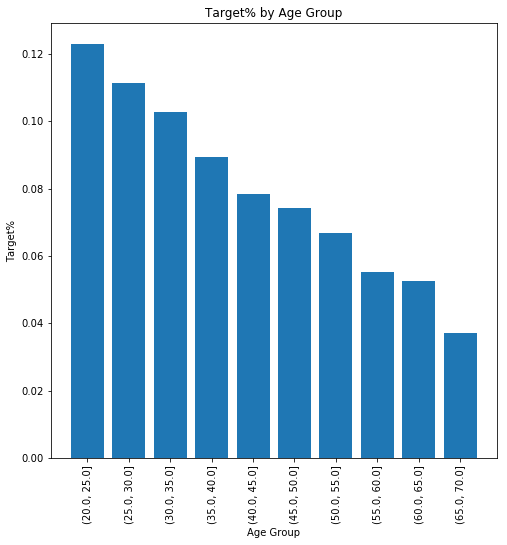

In [30]:
#繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖
age_gp  = age_dt.groupby('YEARS_BIN').mean()
plt.figure(figsize = (8, 8))
plt.bar(range(len(age_gp.index)), age_gp['TARGET'])

plt.xticks(range(len(age_gp.index)), age_gp.index, rotation = 90); plt.xlabel('Age Group'); plt.ylabel('Target%')
plt.title('Target% by Age Group');